No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


summation of all elements (should be 1 or close) 0.9999999999999991
index 0.1
target 0.9
219
index 0.2
target 0.8
214
index 0.30000000000000004
target 0.7
210
index 0.4
target 0.6
206
index 0.5
target 0.5
203
index 0.6
target 0.4
200
index 0.7
target 0.30000000000000004
196
index 0.7999999999999999
target 0.20000000000000007
192
index 0.8999999999999999
target 0.10000000000000009
187


([<matplotlib.axis.YTick at 0x1ed2cf69410>,
 [Text(0, 0.007697808969902152, '0.0076978'),
  Text(0, 0.007664818798416977, '0.0076648'),
  Text(0, 0.0076378668491743785, '0.0076379'),
  Text(0, 0.0076103965615675435, '0.0076104'),
  Text(0, 0.007589441502163541, '0.0075894'),
  Text(0, 0.007568174445321509, '0.0075682'),
  Text(0, 0.007539316677341789, '0.0075393'),
  Text(0, 0.007509863862100155, '0.0075099'),
  Text(0, 0.007472172732562017, '0.0074722')])

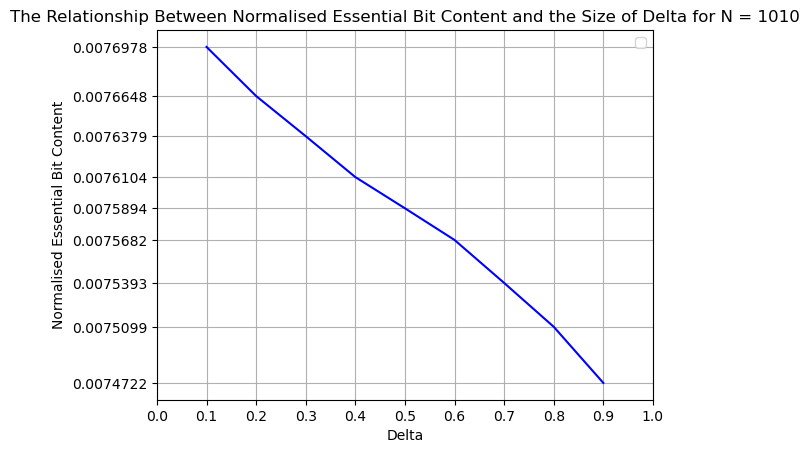

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math

# the delta index
index = 0.1

# !!! ATTENTION !!! 
# please toggle this to see what the NEBC and delta values would look like together for different N values:
size = 1010

# probability of producing a 1
p = 0.20

all_indexes = []
all_nebc = []

# setting up list of probabilities:

# SOURCE: https://medium.com/@c_safarli/binomial-distribution-probability-mass-function-cumulative-distribution-function-calculation-5ae74fd3a340
k = np.arange(0,size+1) # range of numbers from 0 to the index
binomial = binom.pmf(k=k, n=size, p=p) 

bisum = 0

for elem in binomial:
    bisum += elem

print("summation of all elements (should be 1 or close)", bisum)

# higher probabilities have more 0's, hence they are located at the start of the list 
# and we need to reverse them for proper inspection
# SOURCE: https://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array
binomial = binomial[::-1]

probability = 1

while (np.isclose(index, 1.0, rtol=1e-05, atol=1e-08, equal_nan=False) == False):

    print("index", index)

    target = 1 - index

    print("target", target)

    below = False

    while (below == False): 
        for prob in binomial:
            result = probability - prob
            if (result < target):
                below = True
                break
            else:
                probability -= prob
                binomial = np.delete(binomial, 0)

    print(len(binomial))

    ebc = math.log(len(binomial), 2)
    nebc = (1/(size)) * ebc

    all_nebc.append(nebc)
    all_indexes.append(index)

    index += 0.1

# Plot the NEBC against the delta values
plt.plot(all_indexes, all_nebc, color='blue')

# Labels and Legend
plt.title('The Relationship Between Normalised Essential Bit Content and the Size of Delta for N = 1010')
plt.xlabel('Delta')
plt.ylabel('Normalised Essential Bit Content')
plt.legend()
plt.grid()
plt.xticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks(ticks=all_nebc)
